# Table of Contents


* [I. Description and Tool Selection](#tools)
* [II. Data Exploration and Preparation](#Explore)
* [III. Data Analysis](#analysis)
    * [Univariate Stats](#univariate)
    * [Bivariate Stats](#bivariate)
    * [Descriptive and Predictive Methods](#nerdology)
        * [PCA Analysis](#pca)
        * [Logistic Regression](#logistic)
* [IV. Data Summary](#summary)
    * [Citations](#citations) 

# I. Description and Tool Selection <a class="anchor" id="tools"></a>


The goal of this analysis project is to examine specific customer patterns per request of the hypothetical telecommunications company associated to this project. More specifically the goal is to find and determine which possible variables or indicators could be used to make better sound business decisions. I will be using both continuous and discrete variables in order to predict the reasons for churn or (customer loss).

SAS, R and Python are all great data tools. Each has its own specific advantages and disadvantages. For this project, I have selected Python as my tool of choice. SAS is a great tool that offers high speed data crunching with an easy to use GUI interface with their products. SAS is however very expensive and isn't used nearly as much these days. R is also a great tool that has a succinct but non intuitive coding syntax. R is heavily used in academic research. Python is the direction most corporations are moving to these days. Due to its open source nature (money talks), its intuitive coding syntax and robust data science packages, many companies are jumping ship from R and SAS to get on the Python train. Because of market direction and because Jupyter Notebook offers the ability to report through markdown and code within the same one-stop-shop, I have selected Python for this project.

As for statistical methods themselves I will be using both descriptive (unsupervised) and predictive (supervised) methods. I'll be using Principle Component Analysis (PCA) in order to view which continuous variables capture the most variance as components (descriptive). My assumption is that TotalCharges will be highly correlated with MontlyCharges and can be excluded. For the predative method, I will use logistic regression (for the discrete variables) to determine which variables have the highest impact on the company's churn rate.

In [1]:
# Standard best coding practice -- Importing all packages and beginning of project
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, precision_score, roc_curve, auc, accuracy_score, 
recall_score, roc_auc_score)
import warnings
warnings.filterwarnings("ignore")



# Declaring the Directory using OS to ensure the ease of use in working with the directory location
DirectoryLocation = r'C:\Users\andre\Desktop\Extras\WGU\Masters\Data Mining 2'
os.chdir(DirectoryLocation)

In [2]:
# Reading in CSV
df = pd.read_csv('Telco_Customer_Churn.csv')

# II. Data Exploration and Preparation  <a class="anchor" id="Explore"></a>

As typical with any data analysis, after loading the data (as completed above), the next step is to explore and clean that data. This section deals with the initial exploration and preparing the data for analysis. Generally speaking, I will be looking for missing values or data anomalies that may hinder analysis in the future. The goal is to increase model effectiveness during analysis later in this project. Sometimes data preparation can be iterative, meaning it can take place during the actual data analysis phase late, such as evaluating outliers and the likes thereof.

As seen below the data set contains 21 columns. Since I am investigating the churn possibilities and predictors, the target variable will be the Churn variable. This what I am going to try and predict. Note that churn simply means whither or not a customer has stopped service or not (think churned out). True means they left the company.

In [3]:
# Views Columns the column names, counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As seen below, there are several possible predictor variables that I can use to predict the churn. Due to their continuous nature, I will use the MonthlyCharges and TotalCharges within my logistic regression model. Because these are monetary values and as common knowledge are commonly tied to customer loyalty, they will be observed as predictors. I will also attempt to use a variety of multiple other variables with the classification logistic regression model. Please note that tenure multiplied by the MonthlyCharges gives the TotalCharges value. This would seem to indicate that this is the customer's life-span. The only non-applicable column seems to be customerId, which I will remove. CustomerId would be helpful if we were doing joins to other tables, but this isn't applicable here. By removing the column it also helps to reduce data size, which is ALWAYS helpful, if possible.

In [4]:
# Views columns and top 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Removing the customerID column
df.drop('customerID', axis = 1, inplace = True)

In [6]:
# Confirming Removal
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


I am checking below to see if there are any null values within the data set.

In [7]:
# Checking to see if any columns contain null values
for cols in df.columns:
    print(cols + " | missing values are = " + str(df[cols].isna().any()))

gender | missing values are = False
SeniorCitizen | missing values are = False
Partner | missing values are = False
Dependents | missing values are = False
tenure | missing values are = False
PhoneService | missing values are = False
MultipleLines | missing values are = False
InternetService | missing values are = False
OnlineSecurity | missing values are = False
OnlineBackup | missing values are = False
DeviceProtection | missing values are = False
TechSupport | missing values are = False
StreamingTV | missing values are = False
StreamingMovies | missing values are = False
Contract | missing values are = False
PaperlessBilling | missing values are = False
PaymentMethod | missing values are = False
MonthlyCharges | missing values are = False
TotalCharges | missing values are = False
Churn | missing values are = False


In [8]:
# Looking at data where customers have either not started or there is an error in the intial data load
df[df["tenure"] == 0] 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


As seen above, while there isn't any missing data, there does appear to be incomplete data, specifically in regard to TotalCharges where the tenure is equal to 0.  In order to ensure consistency, I am changing tenure equal to one while also ensuring that TotalCharges mirrors the MonthlyCharges column. The below function executes this logic.

In [9]:
# Creating function to handle where tenure appears to be 0 and TotalCharges is missing
def tenurehandler(df):
    df['TotalCharges'] = np.where(df['TotalCharges'] == " ", df['MonthlyCharges'], df['TotalCharges'])
    df['tenure'] = np.where(df['tenure'] == 0, 1, df['tenure'])
    return df

In [10]:
# Calling the above function
tenurehandler(df)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
# Ensuring cleaner function handled replacements appropraitely
df[df["tenure"] == 0] 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [12]:
# Counting the rows of the dataframe
print("Number of rows in Dataframe:", len(df))

Number of rows in Dataframe: 7043


Since tenure and gender are not camel case, I will rename those columns to be consistent with the rest of the data. Additionally, SeniorCitizen appears to be a Boolean value but it is currently classified as an integer. I will change the 0's to False and 1's to True accordingly.

In [13]:
# Scrubbing the column names and changing SeniorCitizen to boolean value
df = df.rename(columns ={"gender": "Gender", "tenure": "Tenure"})
df['SeniorCitizen'] = df['SeniorCitizen'].astype('bool')

In [14]:
# Auditing data changed above
df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,False,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,False,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,False,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,False,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,False,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,False,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,False,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,False,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,True,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Boolean datatypes take up less room than a character data type. As such, and similar to the previous process, below I am replacing "No's" with False and "Yes'" with True. This will enable consistency and help empower more variables for the logistic regression later in this analysis.

In [15]:
# Distinct Values
print("Distinct Values for Partner:", df.Partner.unique())

Distinct Values for Partner: ['Yes' 'No']


In [16]:
# Replace values and convert to Boolean appropriately
df['Partner'] = df['Partner'].replace({"No":False, "Yes":True})
df['Partner'] = df['Partner'].astype('bool')

Auditing initial Boolean value replacements below.

In [17]:
#Initial Boolean audit
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   bool   
 2   Partner           7043 non-null   bool   
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Continuing with same logic.

In [18]:
# Distinct Value
print("Distinct Values for Dependents:", df.Dependents.unique())

Distinct Values for Dependents: ['No' 'Yes']


In [19]:
# Replace values and convert to Boolean appropriately
df['Dependents'] = df['Dependents'].replace({"No":False, "Yes":True})
df['Dependents'] = df['Dependents'].astype('bool')

In [20]:
# Distinct Value
print("Distinct Values for PhoneService:", df.PhoneService.unique())

Distinct Values for PhoneService: ['No' 'Yes']


In [21]:
# Replace values and convert to Boolean appropriately
df['PhoneService'] = df['PhoneService'].replace({"No":False, "Yes":True})
df['PhoneService'] = df['PhoneService'].astype('bool')

In [22]:
# Distinct Value
print("Distinct Values for MultipleLines:", df.MultipleLines.unique())

Distinct Values for MultipleLines: ['No phone service' 'No' 'Yes']


In [23]:
# Distinct Value
print("Distinct Values for InternetService:", df.InternetService.unique())

Distinct Values for InternetService: ['DSL' 'Fiber optic' 'No']


In [24]:
# Distinct Value
print("Distinct Values for OnlineSecurity:", df.OnlineSecurity.unique())

Distinct Values for OnlineSecurity: ['No' 'Yes' 'No internet service']


In [25]:
# Distinct Value
print("Distinct Values for DeviceProtection:", df.DeviceProtection.unique())

Distinct Values for DeviceProtection: ['No' 'Yes' 'No internet service']


In [26]:
# Distinct Value
print("Distinct Values for TechSupport:", df.TechSupport.unique())

Distinct Values for TechSupport: ['No' 'Yes' 'No internet service']


In [27]:
# Distinct Value
print("Distinct Values for StreamingTV:", df.StreamingTV.unique())

Distinct Values for StreamingTV: ['No' 'Yes' 'No internet service']


In [28]:
# Distinct Value
print("Distinct Values for StreamingMovies:", df.StreamingMovies.unique())

Distinct Values for StreamingMovies: ['No' 'Yes' 'No internet service']


In [29]:
# Distinct Value
print("Distinct Values for Contract:", df.Contract.unique())

Distinct Values for Contract: ['Month-to-month' 'One year' 'Two year']


In [30]:
# Distinct Value
print("Distinct Values for PaperlessBilling:", df.PaperlessBilling.unique())

Distinct Values for PaperlessBilling: ['Yes' 'No']


In [31]:
# Replace values and convert to Boolean appropriately
df['PaperlessBilling'] = df['PaperlessBilling'].replace({"No":False, "Yes":True})
df['PaperlessBilling'] = df['PaperlessBilling'].astype('bool')

In [32]:
# Distinct Value
print("Distinct Values for PaymentMethod:", df.PaymentMethod.unique())

Distinct Values for PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Because PaymentMethod has a common occurrence with "automatic", I will create a flag column in order to normalize the table a little further. This takes place in the below cell and will help the overall data structure.

In [33]:
# Loops through each row to parse automatic flag
for i in df.index:
    if  df.at[i, 'PaymentMethod'] == 'Bank transfer (automatic)':
        df.at[i, 'PaymentMethod'] = 'Bank transfer'
        df.at[i, 'AutomaticPayment'] = True
    elif df.at[i, 'PaymentMethod'] == 'Credit card (automatic)':
        df.at[i, 'PaymentMethod'] = 'Credit card'
        df.at[i, 'AutomaticPayment'] = True
    else: 
        df.at[i, 'AutomaticPayment'] = False
        
df['AutomaticPayment'] = df['AutomaticPayment'].astype('bool')

Completing last set of Boolean conversions.

In [34]:
# Distinct Value
print("Distinct Values for Churn:", df.Churn.unique())

Distinct Values for Churn: ['No' 'Yes']


In [35]:
# Replace values and convert to Boolean appropriately
df['Churn'] = df['Churn'].replace({"No":False, "Yes":True})
df['Churn'] = df['Churn'].astype('bool')

Below I am handling the Monthly  and Total charges as well as getting their summary stats and their frequencies. This will help ensure that assumptions are met for later analytics.

In [36]:
# Changing TotalCharges to Float
df['TotalCharges'] = df['TotalCharges'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   bool   
 2   Partner           7043 non-null   bool   
 3   Dependents        7043 non-null   bool   
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   bool   
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   bool   
 16  PaymentMethod     7043 non-null   object 


In [37]:
# Getting summary statistics
df['TotalCharges'].describe()

count    7043.000000
mean     2279.798992
std      2266.730170
min        18.800000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

Below you can see that the TotalCharges is skewed severely right.

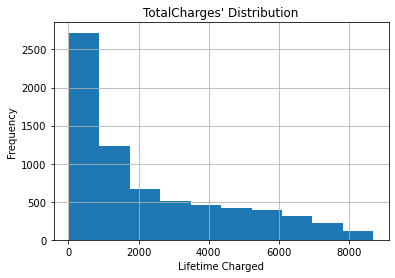

In [38]:
# Getting a frequency diagram
plt.hist(df['TotalCharges'])
plt.title("TotalCharges' Distribution")
plt.xlabel("Lifetime Charged")
plt.ylabel("Frequency")
plt.grid(True)

In [39]:
# Getting summary statistics
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

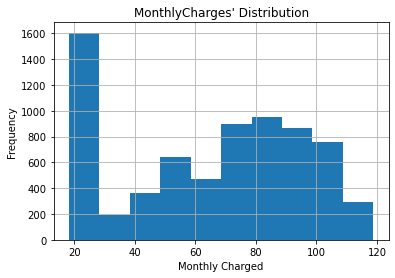

In [40]:
# Getting a frequency diagram
plt.hist(df['MonthlyCharges'])
plt.title("MonthlyCharges' Distribution")
plt.xlabel("Monthly Charged")
plt.ylabel("Frequency")
plt.grid(True)

It’s also worth noting that MonthlyCharges along with TotalCharges are both non-normally distributed. This means that the linear regression model isn’t the best option based upon the assumptions of that particular model. Below saves the cleaned data and exports it to the directory location previously declared.

In [41]:
# Exports cleaned data to excel
df.to_excel('Churn_Cleaned.xlsx')

# III. Data Analysis <a class="anchor" id="analysis"></a>

## Univariate Stats <a class="anchor" id="univariate"></a>

Below are univariate statistics that are used to find the distributions of my categorical variables. Just a note, these are simply variables without interactions (to other variables.) Please note that (Analytics Vidhya, 2020) gave me inspiration for the Univariate Stats portion of this project. 

### Univariate Distribution for Churn

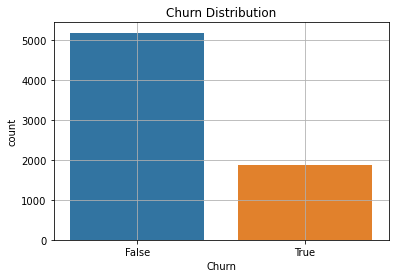

In [42]:
#Churn Stats
sns.countplot(df['Churn'], x="class")
plt.title("Churn Distribution")
plt.grid(True)

### Univariate Distribution for Gender

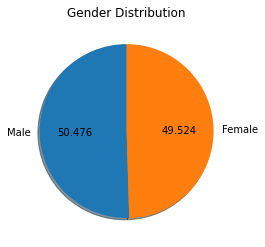

In [43]:
# Gender Stats
plt.pie(df['Gender'].value_counts(), startangle=90,autopct='%.3f',shadow=True,
        labels=['Male', 'Female']
       )
plt.title("Gender Distribution")
plt.grid(True)

### Univariate Distribution for SeniorCitizen

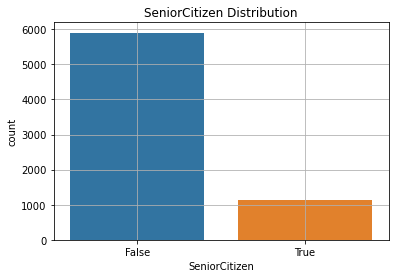

In [44]:
#SeniorCitizen Stats
sns.countplot(df['SeniorCitizen'], x="class")
plt.title("SeniorCitizen Distribution")
plt.grid(True)

### Univariate Distribution for Partner

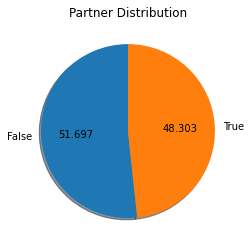

In [45]:
# Partner Stats
plt.pie(df['Partner'].value_counts(), startangle=90,autopct='%.3f',shadow=True,
        labels=['False', 'True']
       )
plt.title("Partner Distribution")
plt.grid(True)

### Univariate Distribution for Dependents

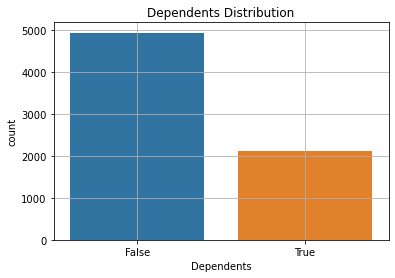

In [46]:
#Dependents Stats
sns.countplot(df['Dependents'], x="class")
plt.title("Dependents Distribution")
plt.grid(True)

### Univariate Distribution for Tenure

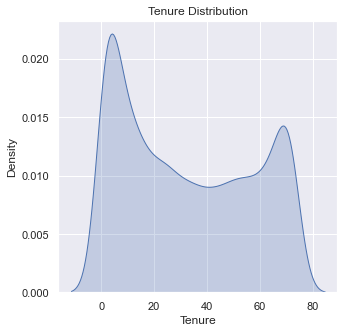

In [47]:
# Tenure Stats
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(df['Tenure'], shade=True)
plt.title("Tenure Distribution")
plt.grid(True)

### Univariate Distribution for PhoneService

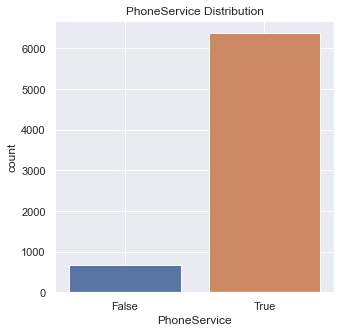

In [48]:
#PhoneService Stats
sns.countplot(df['PhoneService'], x="class")
plt.title("PhoneService Distribution")
plt.grid(True)

### Univariate Distribution for PaperlessBilling

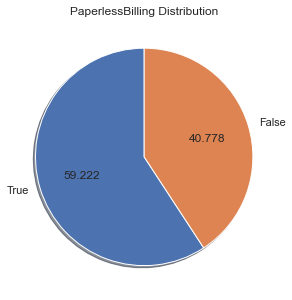

In [49]:
# PaperlessBilling Stats
plt.pie(df['PaperlessBilling'].value_counts(), startangle=90,autopct='%.3f',shadow=True,
        labels=['True', 'False']
       )
plt.title("PaperlessBilling Distribution")
plt.grid(True)

### Univariate Distribution for AutomaticPayment

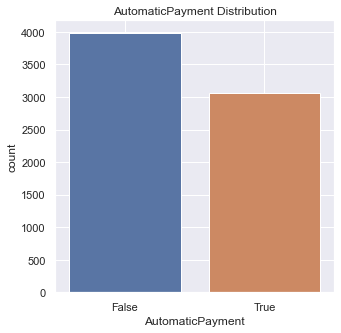

In [50]:
#AutomaticPayment Stats
sns.countplot(df['AutomaticPayment'], x="class")
plt.title("AutomaticPayment Distribution")
plt.grid(True)

### Univariate Distribution for MultipleLines

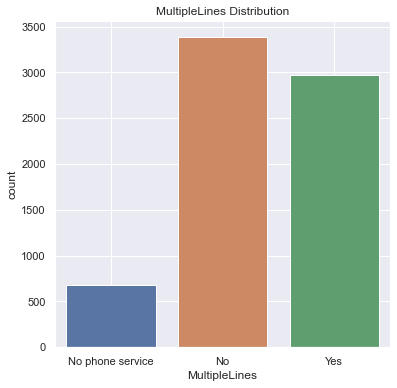

In [51]:
#MultipleLines Stats
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(df['MultipleLines'], x="class")
plt.title("MultipleLines Distribution")
plt.grid(True)

### Univariate Distribution for InternetService

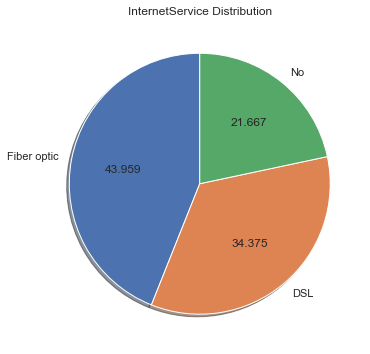

In [52]:
# InternetService Stats
sns.set(rc={'figure.figsize':(6,6)})
plt.pie(df['InternetService'].value_counts(), startangle=90,autopct='%.3f',shadow=True,
        labels=['Fiber optic', 'DSL', 'No']
       )
plt.title("InternetService Distribution")
plt.grid(True)

### Univariate Distribution for OnlineSecurity

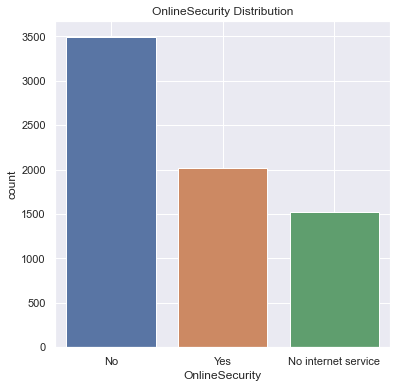

In [53]:
#OnlineSecurity Stats
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(df['OnlineSecurity'], x="class")
plt.title("OnlineSecurity Distribution")
plt.grid(True)

### Univariate Distribution for OnlineBackup

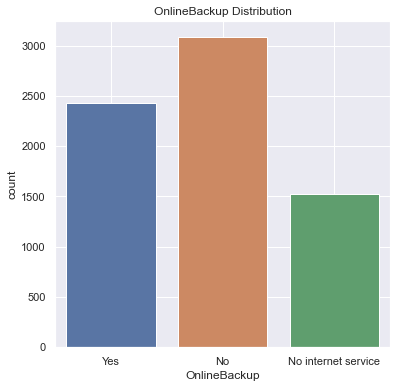

In [54]:
#OnlineBackup Stats
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(df['OnlineBackup'], x="class")
plt.title("OnlineBackup Distribution")
plt.grid(True)

### Univariate Distribution for DeviceProtection

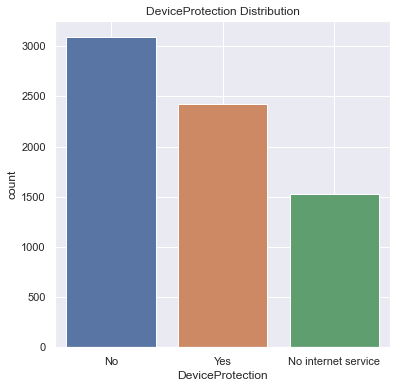

In [55]:
#DeviceProtection Stats
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(df['DeviceProtection'], x="class")
plt.title("DeviceProtection Distribution")
plt.grid(True)

### Univariate Distribution for TechSupport

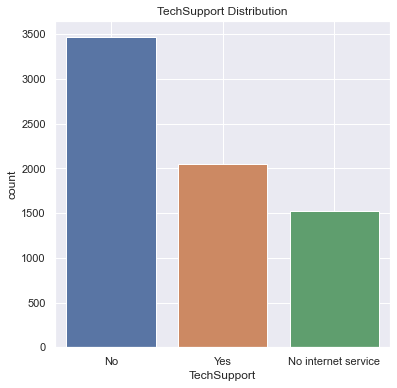

In [56]:
#TechSupport Stats
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(df['TechSupport'], x="class")
plt.title("TechSupport Distribution")
plt.grid(True)

### Univariate Distribution for StreamingTV

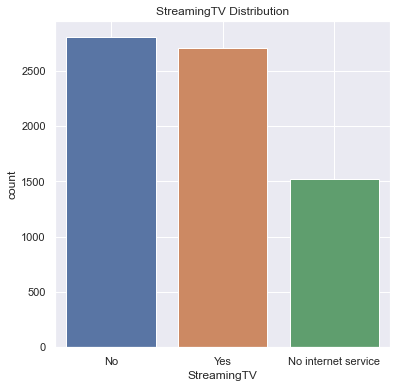

In [57]:
#StreamingTV Stats
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(df['StreamingTV'], x="class")
plt.title("StreamingTV Distribution")
plt.grid(True)

### Univariate Distribution for StreamingMovies

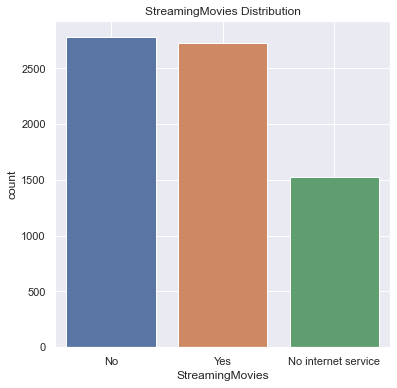

In [58]:
#StreamingMovies Stats
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(df['StreamingMovies'], x="class")
plt.title("StreamingMovies Distribution")
plt.grid(True)

### Univariate Distribution for Contract

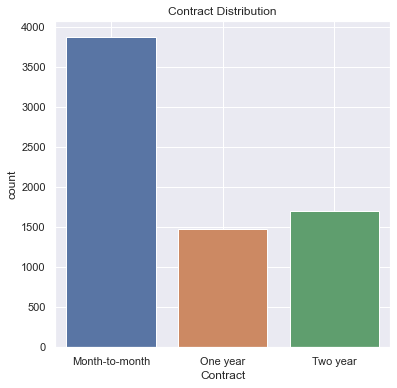

In [59]:
#Contract Stats
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(df['Contract'], x="class")
plt.title("Contract Distribution")
plt.grid(True)

### Univariate Distribution for PaymentMethod

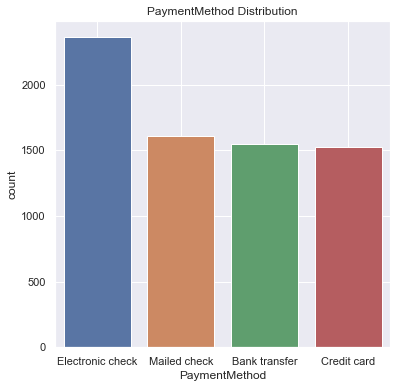

In [60]:
#PaymentMethod Stats
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(df['PaymentMethod'], x="class")
plt.title("PaymentMethod Distribution")
plt.grid(True)

## Bivariate Stats <a class="anchor" id="bivariate"></a>

Since many of the categorical variables will need to evaluated on whither to be included in the later logistic regression model, the Bivariate stats below are used as thresholds for the categorical variables. When thinking of bivariate stats, it's helpful to think of them as variables with an interaction. Also, since churn is what we want to predict, these were all bumped up against churn (as the interaction term.) Contingency tables are used below as 2x2 relationships as well as 2x3 and 2x4 relationship. This not only helps to visualize but also helps with the ease of use with [Fisher's exact test](https://www.statology.org/fishers-exact-test-python/) as well as the [Chi-Square test.](https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b) Fisher's is used where there are 2x2 contingencies because it's more precise than the Chi-square test. Also Chi-square is used when computation is a struggle, in this instance, the computational requirements are minimal. I start with the 2x2 contingency tables, move to the Chi-Square tests and then check our continuous variables last using [ANOVA.](https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/) Also, there are some columns that have been adjusted to be Boolean to prepare room for the later logistic model.

## Fisher’s Exact Tests

### Bivariate Distribution and P-Value for Gender over Churn

In [61]:
# Creates Contingency for Gender
gender = pd.crosstab(df["Gender"], df["Churn"])
gender

Churn,False,True
Gender,,
Female,2549,939
Male,2625,930


In [62]:
# Fisher's Exact test for Gender
stats.fisher_exact(gender)

(0.9617404533698464, 0.48287682857395053)

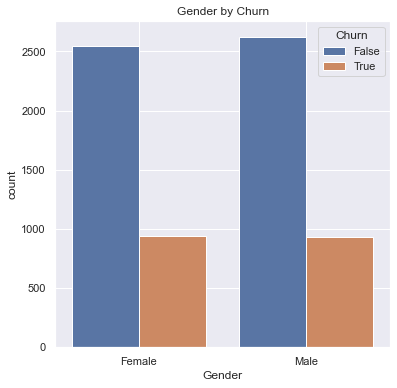

In [63]:
sns.countplot(x = df["Gender"], hue = df["Churn"])
plt.title("Gender by Churn")
plt.grid(True)

Since the P-value (the second value returned above) isn't less than .05, we fail to reject the null hypothesis and conclude that Gender is not significant and not a good variable to use for later prediction methodologies. It will be excluded from Logistic regression later.

### Bivariate Distribution and P-Value for SeniorCitizen over Churn

In [64]:
# Creates Contingency for SeniorCitizen
SeniorCitizen = pd.crosstab(df["SeniorCitizen"], df["Churn"])
SeniorCitizen

Churn,False,True
SeniorCitizen,,
False,4508,1393
True,666,476


In [65]:
# Fisher's Exact test for SeniorCitizen
stats.fisher_exact(SeniorCitizen)

(2.312946111941087, 2.789600990177591e-34)

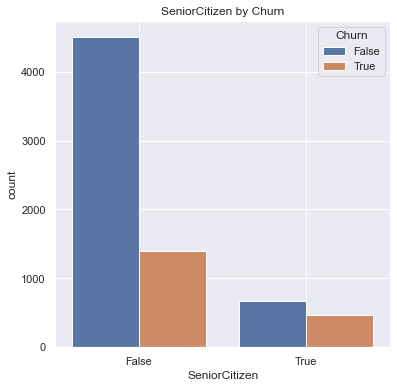

In [66]:
sns.countplot(x = df["SeniorCitizen"], hue = df["Churn"])
plt.title("SeniorCitizen by Churn")
plt.grid(True)

Since the P-value (the second value returned above) is much less than .05, we reject the null hypothesis and conclude that SeniorCitizen is significant and should be explored later in prediction methodologies.

### Bivariate Distribution and P-Value for Partner over Churn

In [67]:
# Creates Contingency for Partner
Partner = pd.crosstab(df["Partner"], df["Churn"])
Partner

Churn,False,True
Partner,,
False,2441,1200
True,2733,669


In [68]:
# Fisher's Exact test for Partner
stats.fisher_exact(Partner)

(0.49793541895353094, 6.920158768013138e-37)

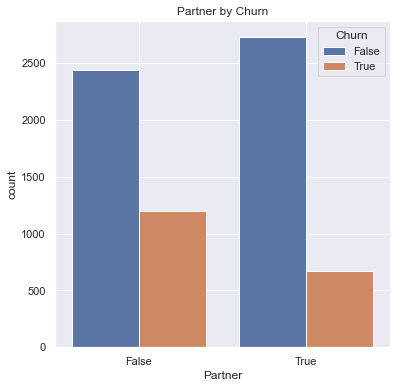

In [69]:
sns.countplot(x = df["Partner"], hue = df["Churn"])
plt.title("Partner by Churn")
plt.grid(True)

Since the P-value (the second value returned above) is much less than .05, we reject the null hypothesis and conclude that Partner is significant and should be explored later in prediction methodologies.

### Bivariate Distribution and P-Value for Dependents over Churn

In [70]:
# Creates Contingency for Dependents
Dependents = pd.crosstab(df["Dependents"], df["Churn"])
Dependents

Churn,False,True
Dependents,,
False,3390,1543
True,1784,326


In [71]:
# Fisher's Exact test for Dependents
stats.fisher_exact(Dependents)

(0.4014731653729122, 4.829268837507231e-46)

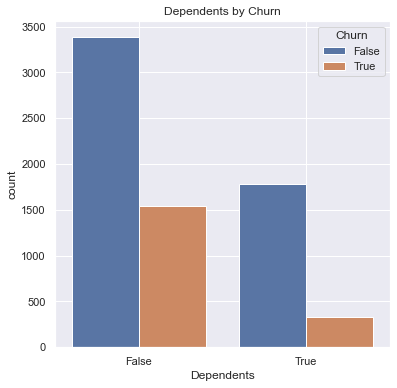

In [72]:
sns.countplot(x = df["Dependents"], hue = df["Churn"])
plt.title("Dependents by Churn")
plt.grid(True)

Since the P-value (the second value returned above) is much less than .05, we reject the null hypothesis and conclude that Dependents is significant and should be explored later in prediction methodologies.

### Bivariate Distribution and P-Value for PhoneService over Churn

In [73]:
# Creates Contingency for PhoneService
PhoneService = pd.crosstab(df["PhoneService"], df["Churn"])
PhoneService

Churn,False,True
PhoneService,,
False,512,170
True,4662,1699


In [74]:
# Fisher's Exact test for PhoneService
stats.fisher_exact(PhoneService)

(1.0975950740656624, 0.3379594144113406)

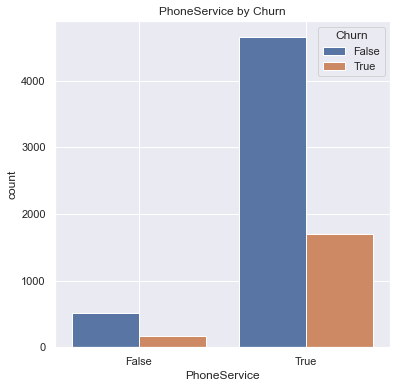

In [75]:
sns.countplot(x = df["PhoneService"], hue = df["Churn"])
plt.title("PhoneService by Churn")
plt.grid(True)

Since the P-value (the second value returned above) isn't less than .05, we fail to reject the null hypothesis and conclude that PhoneService is not significant and not a good variable to use for later prediction methodologies. It will be excluded from Logistic regression later.

### Bivariate Distribution and P-Value for PaperlessBilling over Churn

In [76]:
# Creates Contingency for PaperlessBilling
PaperlessBilling = pd.crosstab(df["PaperlessBilling"], df["Churn"])
PaperlessBilling

Churn,False,True
PaperlessBilling,,
False,2403,469
True,2771,1400


In [77]:
# Fisher's Exact test for PaperlessBilling
stats.fisher_exact(PaperlessBilling)

(2.58864465115778, 1.1812668546461967e-60)

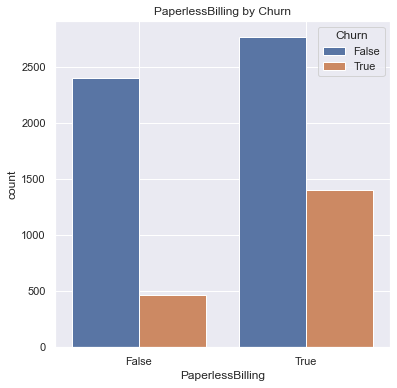

In [78]:
sns.countplot(x = df["PaperlessBilling"], hue = df["Churn"])
plt.title("PaperlessBilling by Churn")
plt.grid(True)

Since the P-value (the second value returned above) is much less than .05, we reject the null hypothesis and conclude that PaperlessBilling is significant and should be explored later in prediction methodologies.

### Bivariate Distribution and P-Value for AutomaticPayment over Churn

In [79]:
# Creates Contingency for AutomaticPayment
AutomaticPayment = pd.crosstab(df["AutomaticPayment"], df["Churn"])
AutomaticPayment

Churn,False,True
AutomaticPayment,,
False,2598,1379
True,2576,490


In [80]:
# Fisher's Exact test for AutomaticPayment
stats.fisher_exact(AutomaticPayment)

(0.3583645994261752, 7.443371979068809e-72)

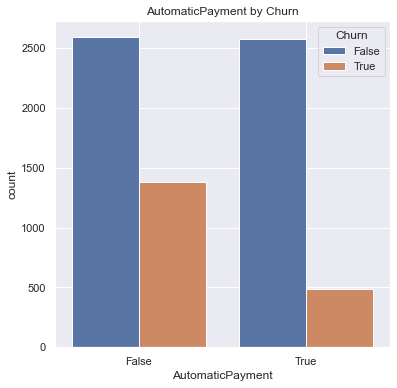

In [81]:
sns.countplot(x = df["AutomaticPayment"], hue = df["Churn"])
plt.title("AutomaticPayment by Churn")
plt.grid(True)

Since the P-value (the second value returned above) is much less than .05, we reject the null hypothesis and conclude that AutomaticPayment is significant and should be explored later in prediction methodologies.

## Chi-Square Tests

### Bivariate Distribution and P-Value for MultipleLines over Churn

In [82]:
# Creates Contingency for MultipleLines
MultipleLines = pd.crosstab(df["MultipleLines"], df["Churn"])
MultipleLines

Churn,False,True
MultipleLines,,
No,2541,849
No phone service,512,170
Yes,2121,850


In [83]:
# Chi-Square test for MultipleLines
stats.chi2_contingency(MultipleLines)

(11.33044148319756,
 0.0034643829548773,
 2,
 array([[2490.39613801,  899.60386199],
        [ 501.01774812,  180.98225188],
        [2182.58611387,  788.41388613]]))

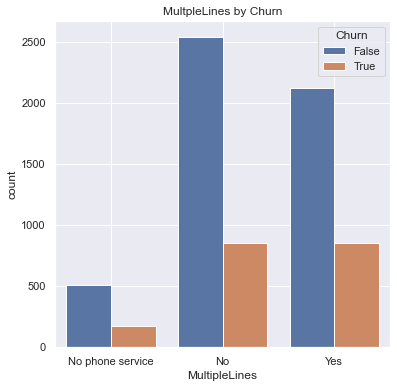

In [84]:
sns.countplot(x = df["MultipleLines"], hue = df["Churn"])
plt.title("MultpleLines by Churn")
plt.grid(True)

Note that the first value is the chi-square statistic, the third number is the degrees of freedom and the second number is the P-value. This concludes that Multiple lines appears to be significant given that the P-Value is less than .05 threshold. This will be examined further in the logistical regression. Also note that because this doesn't have Boolean values, it will be difficult to include in the logistical regression. I am applying Boolean logic below.

In [85]:
# Turning into Boolean Data Type for ease of Logistical Regression later
df['MultipleLines'] = df['MultipleLines'].apply(lambda x: True if x == 'Yes' else False)
df['MultipleLines'] = df['MultipleLines'].astype('bool')

### Bivariate Distribution and P-Value for InternetService over Churn

In [86]:
# Creates Contingency for InternetService
InternetService = pd.crosstab(df["InternetService"], df["Churn"])
InternetService

Churn,False,True
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


In [87]:
# Chi-Square test for InternetService
stats.chi2_contingency(InternetService)

(732.309589667794,
 9.571788222840544e-160,
 2,
 array([[1778.53954281,  642.46045719],
        [2274.41488002,  821.58511998],
        [1121.04557717,  404.95442283]]))

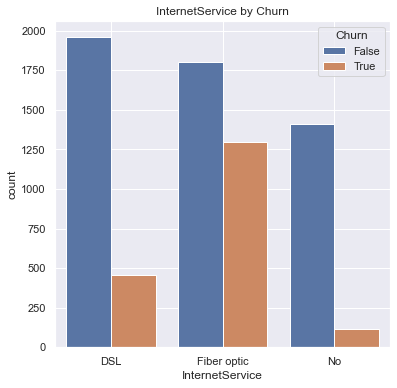

In [88]:
sns.countplot(x = df["InternetService"], hue = df["Churn"])
plt.title("InternetService by Churn")
plt.grid(True)

Since the P-Value for InternetService is less than .05 we reject the null hypothesis and conclude that this variable is significant. We will look more at this later during our logistic regression. Because InternetService doesn't have Boolean values, I will take Values of this column and create a DSL flag column and a FiberOptic flag column. Note: The "no's" will then be found only be filtering to both flag columns. Note: Fiber Optic seems to have a high interaction with churn rate, more to come.

In [89]:
# Turning into Boolean Data Type Flags for ease of Logistical Regression later
df['FiberOptic'] = df['InternetService'].apply(lambda x: True if x == 'Fiber optic' else False)
df['FiberOptic'] = df['FiberOptic'].astype('bool')

df['DSL'] = df['InternetService'].apply(lambda x: True if x == 'DSL' else False)
df['DSL'] = df['DSL'].astype('bool')
df = df.drop(columns=["InternetService"])

### Bivariate Distribution and P-Value for OnlineSecurity over Churn

In [90]:
# Creates Contingency for OnlineSecurity
OnlineSecurity = pd.crosstab(df["OnlineSecurity"], df["Churn"])
OnlineSecurity

Churn,False,True
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


In [91]:
# Chi-Square test for OnlineSecurity
stats.chi2_contingency(OnlineSecurity)

(849.9989679615965,
 2.661149635176552e-185,
 2,
 array([[2569.73619196,  928.26380804],
        [1121.04557717,  404.95442283],
        [1483.21823087,  535.78176913]]))

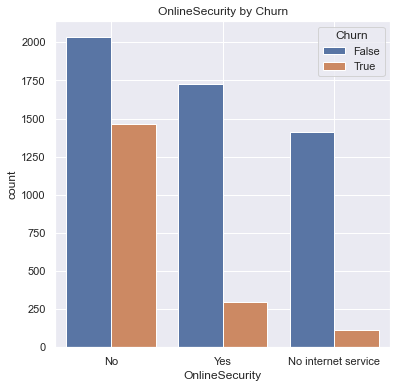

In [92]:
sns.countplot(x = df["OnlineSecurity"], hue = df["Churn"])
plt.title("OnlineSecurity by Churn")
plt.grid(True)

Since the P-Value for OnlineSecurity is less than .05 we reject the null hypothesis and conclude that this variable is significant. We will look more at this later during our logistic regression. Also note that because this doesn't have Boolean values, it will be difficult to include in the logistical regression. I am applying Boolean logic below.

In [93]:
# Turning into Boolean Data Type for ease of Logistical Regression later
df['OnlineSecurity'] = df['OnlineSecurity'].apply(lambda x: True if x == 'Yes' else False)
df['OnlineSecurity'] = df['OnlineSecurity'].astype('bool')

### Bivariate Distribution and P-Value for OnlineBackup over Churn

In [94]:
# Creates Contingency for OnlineBackup
OnlineBackup = pd.crosstab(df["OnlineBackup"], df["Churn"])
OnlineBackup

Churn,False,True
OnlineBackup,,
No,1855,1233
No internet service,1413,113
Yes,1906,523


In [95]:
# Chi-Square test for OnlineBackup
stats.chi2_contingency(OnlineBackup)

(601.812790113409,
 2.0797592160864276e-131,
 2,
 array([[2268.53783899,  819.46216101],
        [1121.04557717,  404.95442283],
        [1784.41658384,  644.58341616]]))

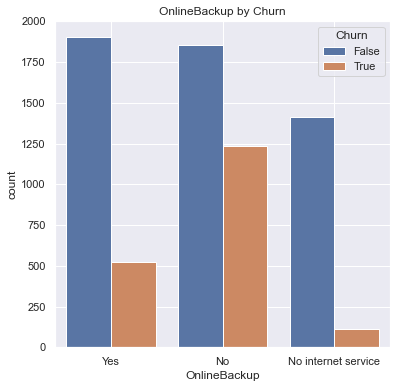

In [96]:
sns.countplot(x = df["OnlineBackup"], hue = df["Churn"])
plt.title("OnlineBackup by Churn")
plt.grid(True)

Since the P-Value for OnlineBackup is less than .05 we reject the null hypothesis and conclude that this variable is significant. We will look more at this later during our logistic regression. Also note that because this doesn't have Boolean values, it will be difficult to include in the logistical regression. I am applying Boolean logic below.

In [97]:
# Turning into Boolean Data Type for ease of Logistical Regression later
df['OnlineBackup'] = df['OnlineBackup'].apply(lambda x: True if x == 'Yes' else False)
df['OnlineBackup'] = df['OnlineBackup'].astype('bool')

### Bivariate Distribution and P-Value for DeviceProtection over Churn

In [98]:
# Creates Contingency for DeviceProtection
DeviceProtection = pd.crosstab(df["DeviceProtection"], df["Churn"])
DeviceProtection

Churn,False,True
DeviceProtection,,
No,1884,1211
No internet service,1413,113
Yes,1877,545


In [99]:
# Chi-Square test for DeviceProtection
stats.chi2_contingency(DeviceProtection)

(558.419369407389,
 5.505219496457244e-122,
 2,
 array([[2273.68024989,  821.31975011],
        [1121.04557717,  404.95442283],
        [1779.27417294,  642.72582706]]))

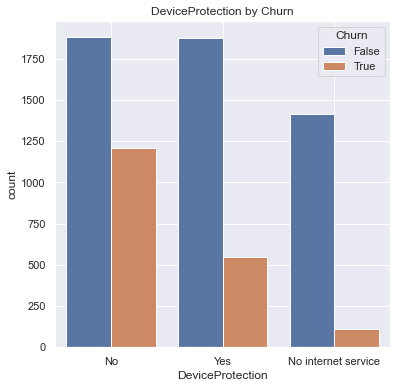

In [100]:
sns.countplot(x = df["DeviceProtection"], hue = df["Churn"])
plt.title("DeviceProtection by Churn")
plt.grid(True)

Since the P-Value for DeviceProtection is less than .05 we reject the null hypothesis and conclude that this variable is significant. We will look more at this later during our logistic regression. Also note that because this doesn't have Boolean values, it will be difficult to include in the logistical regression. I am applying Boolean logic below.

In [101]:
# Turning into Boolean Data Type for ease of Logistical Regression later
df['DeviceProtection'] = df['DeviceProtection'].apply(lambda x: True if x == 'Yes' else False)
df['DeviceProtection'] = df['DeviceProtection'].astype('bool')

### Bivariate Distribution and P-Value for TechSupport over Churn

In [102]:
# Creates Contingency for TechSupport
TechSupport = pd.crosstab(df["TechSupport"], df["Churn"])
TechSupport

Churn,False,True
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


In [103]:
# Chi-Square test for TechSupport
stats.chi2_contingency(TechSupport)

(828.1970684587394,
 1.4430840279998987e-180,
 2,
 array([[2551.37043873,  921.62956127],
        [1121.04557717,  404.95442283],
        [1501.5839841 ,  542.4160159 ]]))

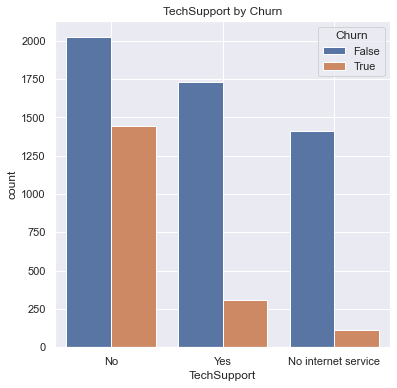

In [104]:
sns.countplot(x = df["TechSupport"], hue = df["Churn"])
plt.title("TechSupport by Churn")
plt.grid(True)

Since the P-Value for TechSupport is less than .05 we reject the null hypothesis and conclude that this variable is significant. We will look more at this later during our logistic regression. Also note that because this doesn't have Boolean values, it will be difficult to include in the logistical regression. I am applying Boolean logic below.

In [105]:
# Turning into Boolean Data Type for ease of Logistical Regression later
df['TechSupport'] = df['TechSupport'].apply(lambda x: True if x == 'Yes' else False)
df['TechSupport'] = df['TechSupport'].astype('bool')

### Bivariate Distribution and P-Value for StreamingTV over Churn

In [106]:
# Creates Contingency for StreamingTV
StreamingTV = pd.crosstab(df["StreamingTV"], df["Churn"])
StreamingTV

Churn,False,True
StreamingTV,,
No,1868,942
No internet service,1413,113
Yes,1893,814


In [107]:
# Chi-Square test for StreamingTV
stats.chi2_contingency(StreamingTV)

(374.2039433109813,
 5.528994485739183e-82,
 2,
 array([[2064.31066307,  745.68933693],
        [1121.04557717,  404.95442283],
        [1988.64375976,  718.35624024]]))

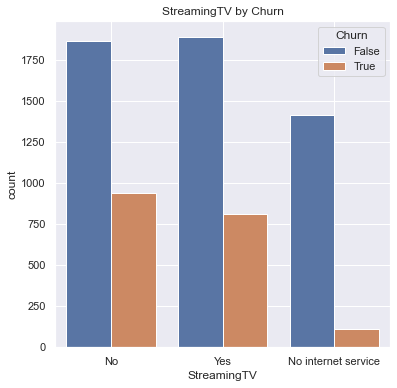

In [108]:
sns.countplot(x = df["StreamingTV"], hue = df["Churn"])
plt.title("StreamingTV by Churn")
plt.grid(True)

Since the P-Value for StreamingTV is less than .05 we reject the null hypothesis and conclude that this variable is significant. We will look more at this later during our logistic regression. Also note that because this doesn't have Boolean values, it will be difficult to include in the logistical regression. I am applying Boolean logic below.

In [109]:
# Turning into Boolean Data Type for ease of Logistical Regression later
df['StreamingTV'] = df['StreamingTV'].apply(lambda x: True if x == 'Yes' else False)
df['StreamingTV'] = df['StreamingTV'].astype('bool')

### Bivariate Distribution and P-Value for StreamingMovies over Churn

In [110]:
# Creates Contingency for StreamingMovies
StreamingMovies = pd.crosstab(df["StreamingMovies"], df["Churn"])
StreamingMovies

Churn,False,True
StreamingMovies,,
No,1847,938
No internet service,1413,113
Yes,1914,818


In [111]:
# Chi-Square test for StreamingMovies
stats.chi2_contingency(StreamingMovies)

(375.6614793452656,
 2.667756755723681e-82,
 2,
 array([[2045.94490984,  739.05509016],
        [1121.04557717,  404.95442283],
        [2007.00951299,  724.99048701]]))

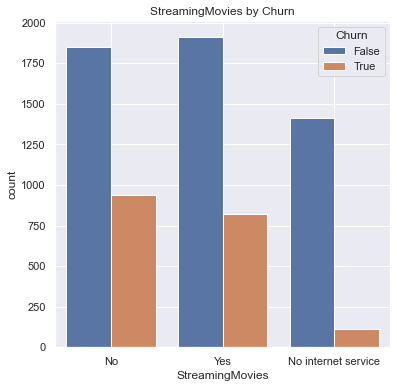

In [112]:
sns.countplot(x = df["StreamingMovies"], hue = df["Churn"])
plt.title("StreamingMovies by Churn")
plt.grid(True)

Since the P-Value for StreamingMovies is less than .05 we reject the null hypothesis and conclude that this variable is significant. We will look more at this later during our logistic regression. Also note that because this doesn't have Boolean values, it will be difficult to include in the logistical regression. I am applying Boolean logic below.

In [113]:
# Turning into Boolean Data Type for ease of Logistical Regression later
df['StreamingMovies'] = df['StreamingMovies'].apply(lambda x: True if x == 'Yes' else False)
df['StreamingMovies'] = df['StreamingMovies'].astype('bool')

### Bivariate Distribution and P-Value for Contract over Churn

In [114]:
# Creates Contingency for Contract
Contract = pd.crosstab(df["Contract"], df["Churn"])
Contract

Churn,False,True
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [115]:
# Chi-Square test for Contract
stats.chi2_contingency(Contract)

(1184.5965720837926,
 5.863038300673391e-258,
 2,
 array([[2846.69175067, 1028.30824933],
        [1082.11018032,  390.88981968],
        [1245.198069  ,  449.801931  ]]))

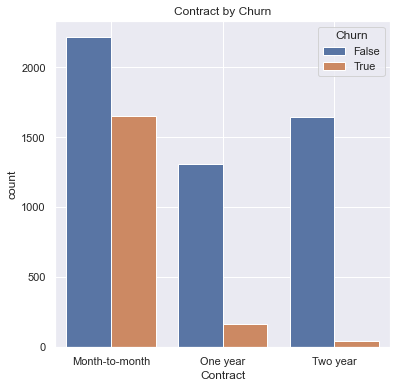

In [116]:
sns.countplot(x = df["Contract"], hue = df["Churn"])
plt.title("Contract by Churn")
plt.grid(True)

Since the P-Value for Contract is less than .05 we reject the null hypothesis and conclude that this variable is significant. We will look more at this later during our logistic regression.  Because Contract doesn't have Boolean values, I will take Values of this column and create a Mth2MthContract flag column, a OneYearContract flag column and a TwoYearContract flag column. Note: Month-to-month seems to have a high impact on churn rate, more to come.

In [117]:
# Turning into Boolean Data Type Flags for ease of Logistical Regression later
df['Mth2MthContract'] = df['Contract'].apply(lambda x: True if x == 'Month-to-month' else False)
df['Mth2MthContract'] = df['Mth2MthContract'].astype('bool')

df['OneYearContract'] = df['Contract'].apply(lambda x: True if x == 'One year Contract' else False)
df['OneYearContract'] = df['OneYearContract'].astype('bool')

df['TwoYearContract'] = df['Contract'].apply(lambda x: True if x == 'Two year' else False)
df['TwoYearContract'] = df['TwoYearContract'].astype('bool')
df = df.drop(columns=["Contract"])

### Bivariate Distribution and P-Value for PaymentMethod over Churn

In [118]:
# Creates Contingency for PaymentMethod
PaymentMethod = pd.crosstab(df["PaymentMethod"], df["Churn"])
PaymentMethod

Churn,False,True
PaymentMethod,,
Bank transfer,1286,258
Credit card,1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [119]:
# Chi-Square test for PaymentMethod
stats.chi2_contingency(PaymentMethod)

(648.1423274814,
 3.6823546520097993e-140,
 3,
 array([[1134.26891949,  409.73108051],
        [1118.10705665,  403.89294335],
        [1737.40025557,  627.59974443],
        [1184.22376828,  427.77623172]]))

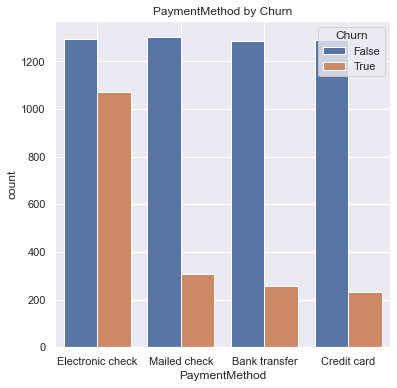

In [120]:
sns.countplot(x = df["PaymentMethod"], hue = df["Churn"])
plt.title("PaymentMethod by Churn")
plt.grid(True)

Since the P-Value for PaymentMethod is less than .05 we reject the null hypothesis and conclude that this variable is significant. We will look more at this later during our logistic regression. Because PaymentMethod doesn't have Boolean values, I will take Values of this column and create a ElectronicCheck flag column, a MailedCheck flag column, an ACH flag column and a CreditCard flag column. As this is the last data change, I have also called pandas.info to see the dataframe state as a visual audit.

In [121]:
# Turning into Boolean Data Type Flags for ease of Logistical Regression later
df['ElectronicCheck'] = df['PaymentMethod'].apply(lambda x: True if x == 'Electronic check' else False)
df['ElectronicCheck'] = df['ElectronicCheck'].astype('bool')

df['MailedCheck'] = df['PaymentMethod'].apply(lambda x: True if x == 'Mailed check' else False)
df['MailedCheck'] = df['MailedCheck'].astype('bool')

df['ACH'] = df['PaymentMethod'].apply(lambda x: True if x == 'Bank transfer' else False)
df['ACH'] = df['ACH'].astype('bool')

df['CreditCard'] = df['PaymentMethod'].apply(lambda x: True if x == 'Credit card' else False)
df['CreditCard'] = df['CreditCard'].astype('bool')
df = df.drop(columns=["PaymentMethod"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   bool   
 2   Partner           7043 non-null   bool   
 3   Dependents        7043 non-null   bool   
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   bool   
 6   MultipleLines     7043 non-null   bool   
 7   OnlineSecurity    7043 non-null   bool   
 8   OnlineBackup      7043 non-null   bool   
 9   DeviceProtection  7043 non-null   bool   
 10  TechSupport       7043 non-null   bool   
 11  StreamingTV       7043 non-null   bool   
 12  StreamingMovies   7043 non-null   bool   
 13  PaperlessBilling  7043 non-null   bool   
 14  MonthlyCharges    7043 non-null   float64
 15  TotalCharges      7043 non-null   float64
 16  Churn             7043 non-null   bool   


## ANOVA (continuous  predictors)

Note that while Tenure is technically a discrete variable (categorical or countable) it is a number and we will be using ANOVA to determine whether means are significantly different. In order to perform the Analysis of Variance calcuations below, I have split the dataframe in two parts (churned customers vs retained customers). Note that while Tenure is technically a discrete variable (categorical or countable) it is a number and we will be using ANOVA to determine whether means of those populations are significantly different. In order to perform the Analysis of Variance calculations below, I have split the dataframe in two parts (churned customers vs retained customers). 

In [122]:
# Breaking down all data into Churned vs UnChurned
Churned = df[df['Churn'] == True]
Retained = df[df['Churn'] == False]

### Bivariate Distribution and P-Value via ANOVA for Tenure over Churn

In [123]:
# Anova for Tenure
#Declare Data
Tenure = df[['Tenure', 'Churn']]
# Weight ~ Group (this sets up the model)
mod = ols('Tenure ~ Churn',
                data=Tenure).fit()

# Run Anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df           F         PR(>F)
Churn     5.270818e+05     1.0  997.703173  6.609786e-205
Residual  3.719727e+06  7041.0         NaN            NaN


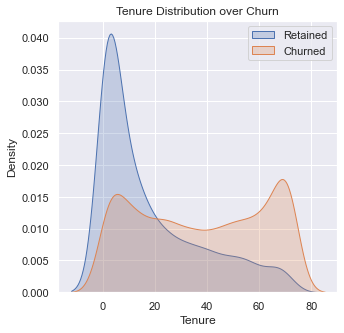

In [124]:
# Tenure Stats
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(Churned['Tenure'], shade=True)
sns.kdeplot(Retained['Tenure'], shade=True)
plt.title("Tenure Distribution over Churn")
plt.legend(["Retained", "Churned"])
plt.grid(True)

With the F value less than .05, it is safe to assume that the means of at least one of the values are groups are not equal and need further investigation. It is also safe to assume that the short of time with the company the lower the churn rate.

### Bivariate Distribution and P-Value via ANOVA for MonthlyCharges over Churn

In [125]:
# Anova for MonthlyCharges
#Declare Data
MonthlyCharges = df[['MonthlyCharges', 'Churn']]
# Weight ~ Group (this sets up the model)
mod = ols('MonthlyCharges ~ Churn',
                data=MonthlyCharges).fit()

# Run Anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df           F        PR(>F)
Churn     2.383740e+05     1.0  273.463704  2.706646e-60
Residual  6.137530e+06  7041.0         NaN           NaN


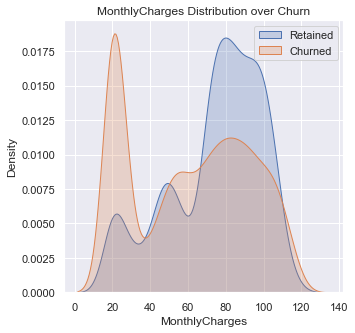

In [126]:
# MonthlyCharges Stats
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(Churned['MonthlyCharges'], shade=True)
sns.kdeplot(Retained['MonthlyCharges'], shade=True)
plt.title("MonthlyCharges Distribution over Churn")
plt.legend(["Retained", "Churned"])
plt.grid(True)

With the F value less than .05, it is safe to assume that the means of at least one of the values are groups are not equal and need further investigation. It is also safe to assume those with a MontlyCharge of $70-110 were more loyal customers.

### Bivariate Distribution and P-Value via ANOVA for TotalCharges over Churn

In [127]:
# Anova for TotalCharges
#Declare Data
TotalCharges = df[['TotalCharges', 'Churn']]
# Weight ~ Group (this sets up the model)
mod = ols('TotalCharges ~ Churn',
                data=TotalCharges).fit()

# Run Anova
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq      df           F        PR(>F)
Churn     1.423466e+09     1.0  288.347899  2.057692e-63
Residual  3.475879e+10  7041.0         NaN           NaN


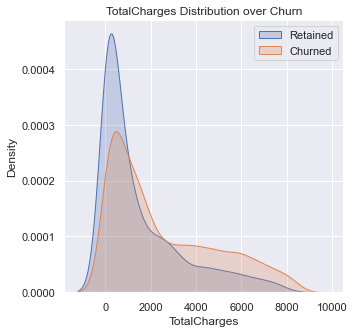

In [128]:
# TotalCharges Stats
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(Churned['TotalCharges'], shade=True)
sns.kdeplot(Retained['TotalCharges'], shade=True)
plt.title("TotalCharges Distribution over Churn")
plt.legend(["Retained", "Churned"])
plt.grid(True)

With the F value less than .05, it is safe to assume that the means of at least one of the values are groups are not equal and need further investigation. It is also safe to assume those with a TotalCharges of less than $1500 were more loyal customers. This is likely a direct correlation with Tenure. 

## Descriptive and Predictive Methods <a class="anchor" id="nerdology"></a>

### PCA Analysis <a class="anchor" id="pca"></a>

PCA analysis is a great way to figure out which variables explain a majority of the variance and reduces those to what are called Principle Components. I will be looking at PCA with at the continuous variable level. The assumption is that TotalCharges are highly correlated with MonthlyCharges and will need to be removed. 

In [129]:
# Defining PCA data frame
pca_df = df[['Tenure', 'MonthlyCharges', 'TotalCharges']]
pca_df = preprocessing.MinMaxScaler().fit_transform(pca_df)

# Execute PCA Analysis
pca = PCA(n_components=3)
pca.fit(pca_df) 
pca_df


array([[0.        , 0.11542289, 0.0012751 ],
       [0.46478873, 0.38507463, 0.21586661],
       [0.01408451, 0.35422886, 0.01031041],
       ...,
       [0.14084507, 0.11293532, 0.03780868],
       [0.04225352, 0.55870647, 0.03321025],
       [0.91549296, 0.86965174, 0.78764136]])

The code below attempt to explain for each additional variable, what is the total number of variance explained by the variables.

In [130]:
#Principle Components in order of variance Ratio
print(pca.explained_variance_ratio_)

[0.71147774 0.27098732 0.01753493]


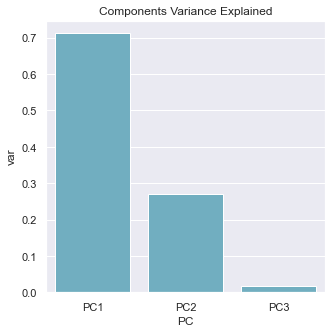

In [131]:
#Visual representation of the explained variance of the componenets
components = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3']})
plt.title("Components Variance Explained")
sns.barplot(x='PC',y="var", 
           data=components, color="c");

As seen above with the explained variance ratio and the bar graph, 98% (71%+27%) of the variance can be explained by using the Tenure and MonthyCharges column. Again, this is highly likely because of a heavy correlation between MonthlyCharges and TotalCharges. I will review below to confirm.

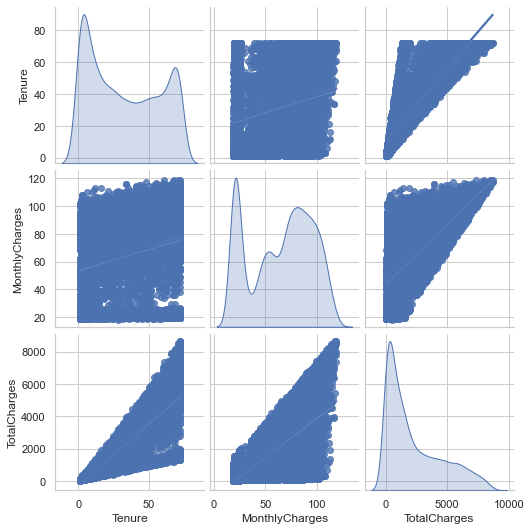

In [132]:
# Shows coorelation between each variable's interaction terms
sns.set(style="whitegrid")
sns.pairplot(df[['Tenure', 'MonthlyCharges', 'TotalCharges']], kind='reg', diag_kind='kde')
plt.show()

I have confirmed that there is a high correlation between MonthlyCharges and TotalCharges. MontlyCharges will be removed from the analysis below. Below removes any columns from the dataframe that will not be used in the analysis. This is based upon previous findings above. I will remove below three columns that won’t be need for further analysis.

In [133]:
# Removing three columns that will not be needed for further prediction
df = df.drop(columns=["Gender", "PhoneService", "TotalCharges"])

In [134]:
# Auditing dropped columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   bool   
 1   Partner           7043 non-null   bool   
 2   Dependents        7043 non-null   bool   
 3   Tenure            7043 non-null   int64  
 4   MultipleLines     7043 non-null   bool   
 5   OnlineSecurity    7043 non-null   bool   
 6   OnlineBackup      7043 non-null   bool   
 7   DeviceProtection  7043 non-null   bool   
 8   TechSupport       7043 non-null   bool   
 9   StreamingTV       7043 non-null   bool   
 10  StreamingMovies   7043 non-null   bool   
 11  PaperlessBilling  7043 non-null   bool   
 12  MonthlyCharges    7043 non-null   float64
 13  Churn             7043 non-null   bool   
 14  AutomaticPayment  7043 non-null   bool   
 15  FiberOptic        7043 non-null   bool   
 16  DSL               7043 non-null   bool   


### Logistic Regression <a class="anchor" id="logistic"></a> 

The main reason [Logistic Regression](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc) was used as a method was because it is highly accurate model and the data was able to be converted into many categorical Boolean variables. This section not only defines the effectiveness of the model but also explains which variables help to predict churn rate the best.

In [135]:
# Declaring Logistic regression function and X and Y variable/array
logreg = LogisticRegression()
X = df.drop(columns=["Churn"])
Y = df.Churn

Below splits the data into training and validation data in order to give the model an honest assessment later.

In [136]:
# Splitting the Data for training and validation models (70/30 split)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [137]:
# Fitting the model
logreg.fit(X_train,y_train)
# Calling the confusion matrix
y_pred=logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1386,  174],
       [ 262,  291]], dtype=int64)

Text(0.5, 320.8, 'Predicted label')

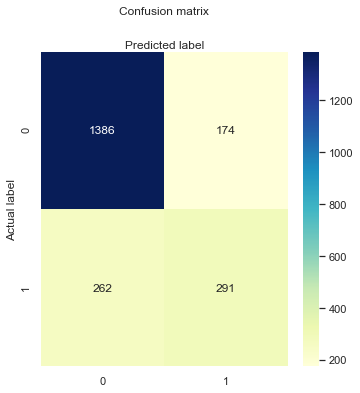

In [138]:
#Creating confusion matrix heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Please note:** 
* The that accuracy is correct predictions divided by the total predictions ((true positives + true negatives)/(true positives + true negatives + false positives + false negatives))
* The precision is equal to the true positives divided by the true and false positives (true positives/(true positives + false positives))
* The recall is equal to the true positives divided by the true positives and false negatives (true positives/(true positives + false negatives))

In [139]:
# Viewing Model Metrics
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Accuracy: 0.7936583057264552
Precision: 0.6258064516129033
Recall: 0.5262206148282098


As seen above the accuracy of this model is almost 80% which is considered a good accuracy for a model. 

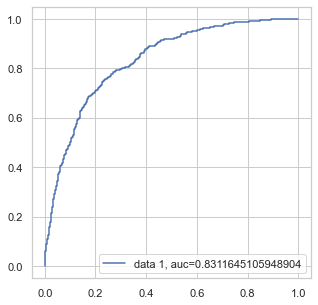

In [140]:
# Viewing Roc Curve of Model
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The roc curve indicates that 83% would explain a better predicative model relative to if Churn was selected just upon chance.

In [141]:
# Creating Coefficent table to discern which variables expalin the most predicition power
coefs = pd.concat([pd.DataFrame(df.columns.drop('Churn')),
                   pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)

Below we can see the variables that correspond to a greater churn rate. Some items that make complete sense are those items with a positive association to customer retention. Take for example, it would be expected that those with Online Security, Online Backups, Tech Support and less hassle (aka, automatic payments) would have a positive impact on Churn. The greatest variable that tends to have a high churn rate effect seem to be those with Fiber Optic internet service. If we think critically about this service from our own experience this makes sense. Fiber often promises higher speeds that are often not delivered upon, which could be a cause of the higher Churn in these customers. 

In [142]:
coefs.columns = ["Variable", "Coefficent"]
coefs

,Variable,Coefficent
0,SeniorCitizen,0.283647
1,Partner,0.037625
2,Dependents,-0.238903
3,Tenure,-0.034134
4,MultipleLines,0.315805
5,OnlineSecurity,-0.378726
6,OnlineBackup,-0.222757
7,DeviceProtection,0.049417
8,TechSupport,-0.288292
9,StreamingTV,0.270524


## IV. Data Summary <a class="anchor" id="summary"></a> 

I was in fact able to discern through predictive analytics that the variable Churn was affected by various categorical variables. The largest contributor to churn seems to be those customer with Fiber Optic Service. It is worth noting that it is more than twice as influential as DSL service. Since both flags originally have been derived from the same variable it is safe to assume that the internet services division of this company needs the most attention. Something I was surprised to see was that the cost of the service did not adversely affect the churn rate. 

As far a customer retention is concerned, is also seems that customers like flexibility. I would encourage the company to keep those members that have month-to-month contracts while also pursing more customers with that same sort of contract. 

### Citations <a class="anchor" id="citations"></a> 

analyticsvidhya.com (2020, July 29). Retrieved from:  https://www.analyticsvidhya.com/blog/2020/07/univariate-analysis-visualization-with-illustrations-in-python/

statology.org (2020, July 9). Retrieved from: https://www.statology.org/fishers-exact-test-python/

towardsdatascience.com (2018, May 7). Retrieved from: https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b

marsja.se (2016, February 24). Retrieved from: https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

towardsdatascience.com (2018, May 15). Retrieved from: https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc